In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [3]:
len(df)

6704

# Data Preprocessing

In [4]:
df.shape

(6704, 9)

In [5]:
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [8]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

checking data types for everycolumn

In [9]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

check for unique value for each column

In [10]:
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

In [11]:
df['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [12]:
df.Gender.value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

In [13]:
df.drop(df[df['Gender'] == 'Other'].index, inplace=True)

Grouping the Job title

In [14]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [15]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower() 
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [16]:
df['Job Title'].unique()

array(['Software/Developer', 'Data Analyst/Scientist',
       'Manager/Director/VP', 'Sales', 'Marketing/Social Media',
       'Customer Service/Receptionist', 'Other', 'IT/Technical Support',
       'Product/Designer', 'Financial/Accountant', 'HR/Human Resources',
       'Operations/Supply Chain'], dtype=object)

In [17]:
df.nunique()

Age                     41
Gender                   2
Education Level          7
Job Title               12
Years of Experience     37
Salary                 437
Country                  5
Race                    10
dtype: int64

In [18]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In the dataset the education level is represented in two different ways : Bachelor and Bachelor degree, which means same. So I will be grouping it with Bachelor

Grouping the Education level

In [19]:
def group_education(Educaton):
    
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)   

In [20]:
df['Education Level'].unique()

array(['Bachelors', 'Masters', 'PhD', 'High School'], dtype=object)

#### Descriptive Statistics

In [21]:
df.describe()

,Age,Years of Experience,Salary
count,6684.000000,6684.000000,6684.000000
mean,33.610563,8.077723,115307.175194
std,7.595994,6.029305,52806.810881
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [22]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the data and try to understand the data. I will begin by looking at the distribution of data across the datset, followed by visualizing the data to understand the relationship between the features and the target variable.

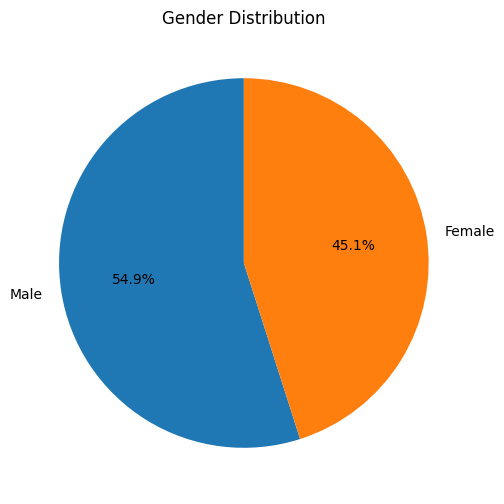

In [23]:
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',startangle=90)
plt.title('Gender Distribution')
plt.show()

The pie chart shows that majority of the employees are male with 54.9 % on the dataset, followed by females with 45.1% 

### Age Distribution

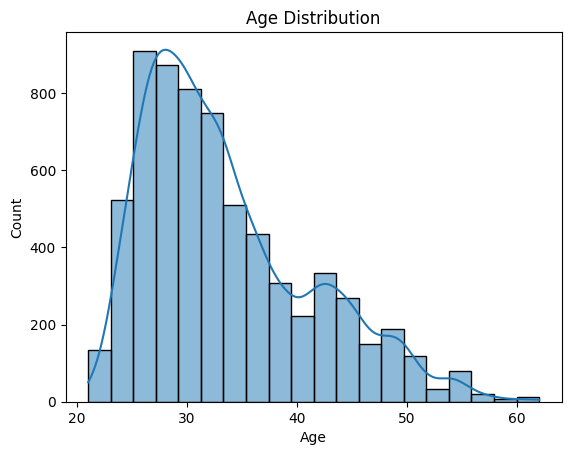

In [24]:
sns.histplot(data=df,x='Age',kde=True,bins=20)
plt.title('Age Distribution')
plt.show()


Majority of the employees are in the range of 25 - 35 years of age, which means majority of the employees are young and energetic. There is only minimal number of old employees in the dataset having age more than 55 years.

### Education Level

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14448\3744545817.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Education Level',palette='Set1')


([0, 1, 2, 3],
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Masters'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'High School')])

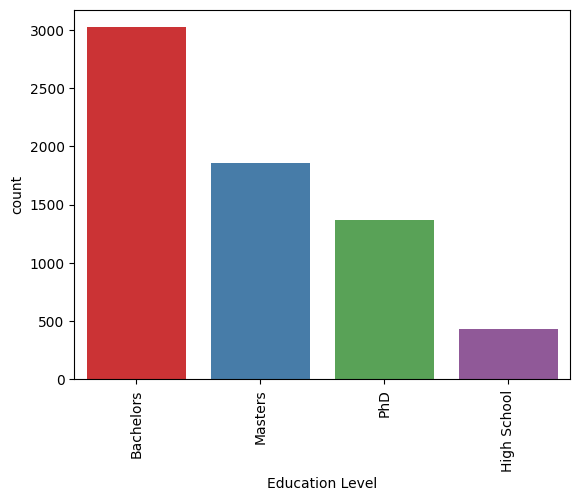

In [25]:
sns.countplot(data=df,x='Education Level',palette='Set1')
plt.xticks(rotation=90)

Most of the employees have a Bachelor's degree followed by Master's degree and Doctoral degree. The least number of employees have a High School education. From the graph it is clear that most of the employees started working after graduation, few of them started working after post graduation and very few of them have gone for doctorate. The least number of employees have started working after high school education.

### Job Title

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14448\96609308.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Job Title',palette='Set1')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

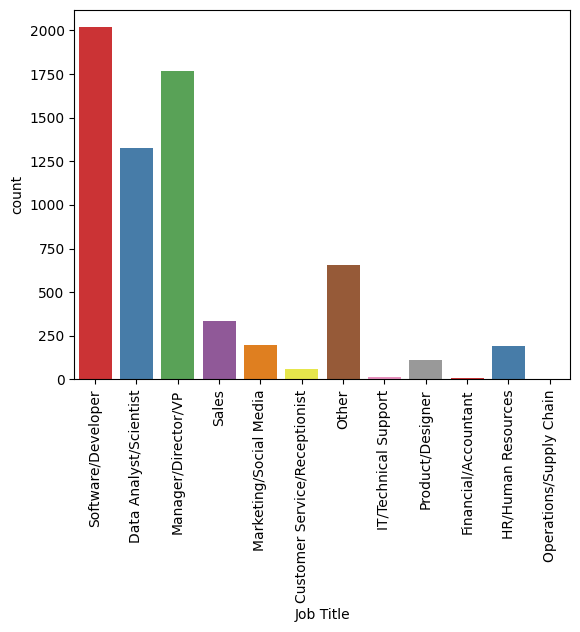

In [26]:
sns.countplot(data=df,x='Job Title',palette='Set1')
plt.xticks(rotation=90)

This graph helps us to breakdown the data of job title in a simpler form. From the graph, it is clear that majority of the employees have job titles - Software Developer, Data Analyst/Scientist or Manager/Director/Vp. Few amount of employees have job titles such as sales, marketing/social media, HR, Product Designer and Customer Service. Very few of the eomployees work as a Financial/accountant or operation/supply management.

From this I build a hypothesis that the job titles such as Software Developer, Data Analyst/Scientist and Manager/Director are in more demand as compared to other job titles. It also means that job titles like Financial/accountant or operation/supply management and Customer Service are in less demand and paid comparatively less.

### Years of Experience

<Axes: xlabel='Years of Experience', ylabel='Count'>

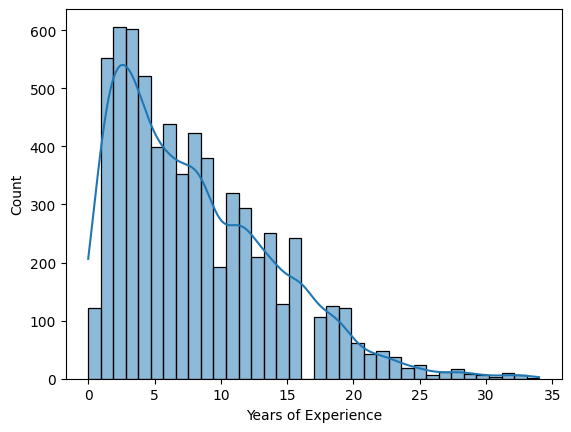

In [27]:
sns.histplot(data=df,x='Years of Experience',kde=True)

Most of the employees in the dataset havr experience of 0-7 years in the respective domains in which particularly majority of them have experience between less than 5 years. Moreover the number of employees in the dataset decreases with increasing number of years of experience.

### Country

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14448\3687300750.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Country',palette='Set1')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

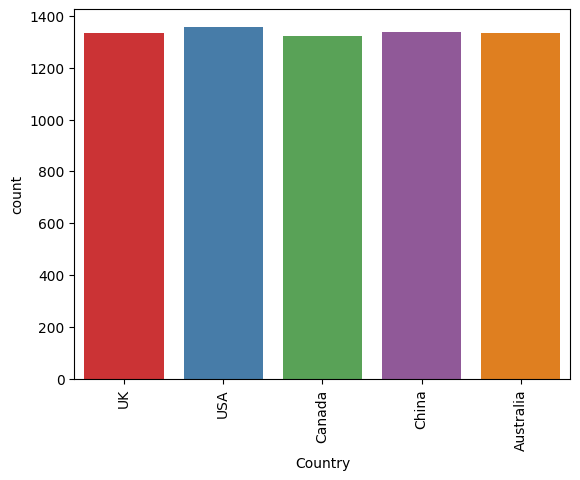

In [28]:
sns.countplot(data=df,x='Country',palette='Set1')
plt.xticks(rotation=90)

The number of employees from the above 5 countries is nearly same, with a little more in USA.

### Recial Distribution


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14448\2883814872.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Race',palette='Set1')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

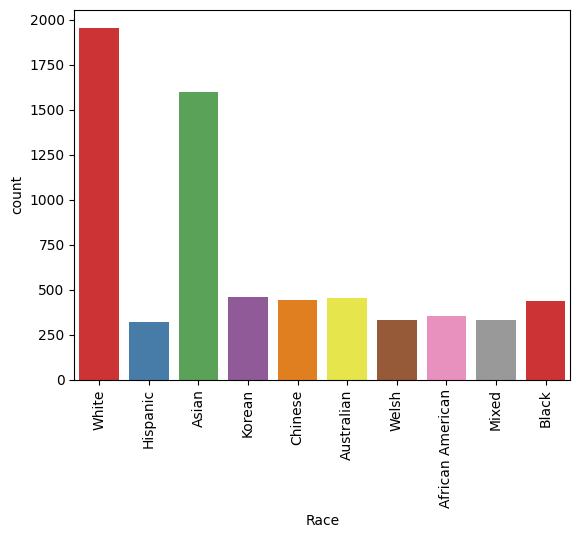

In [29]:
sns.countplot(data=df,x='Race',palette='Set1')
plt.xticks(rotation=90)

This graph help us to know about the racial distribution in the dataset. From the graph, it is clear that most of the employees are either White or Asian, followed by Korean, Chinese, Australian and Black. Number of employees from Welsh, African American, Mixed and Hispanic race are less as compared to other groups.

From all the above plots and graphs, we can a understanding about the data we are dealing with, its distribution and quantity as well. Now I am gonna explore the realtion of these independent variables with the target Variable i.e. Salary.

Text(0.5, 1.0, 'Age vs Salary')

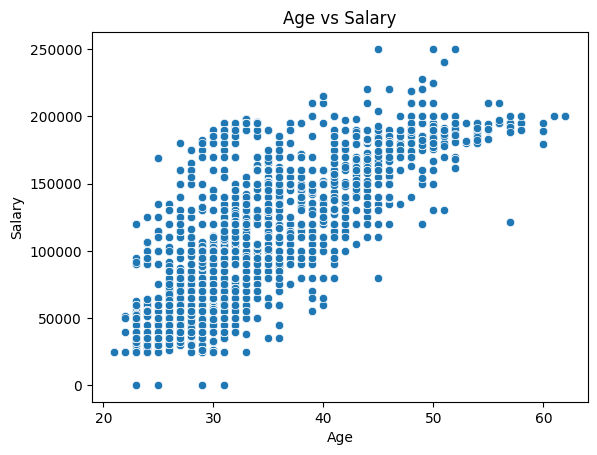

In [31]:
sns.scatterplot(x='Age',y='Salary',data=df)
plt.title('Age vs Salary')

In this scatter plot we see a trend that the salary of the person increases with increse in the age, which is obvious because of promotion and apprisals. However upon closer observation we can find that similar age have multiple salaries, which means there are other factors which decides the salary.

### Gender and Salary

Text(0.5, 1.0, 'Gender vs Salary')

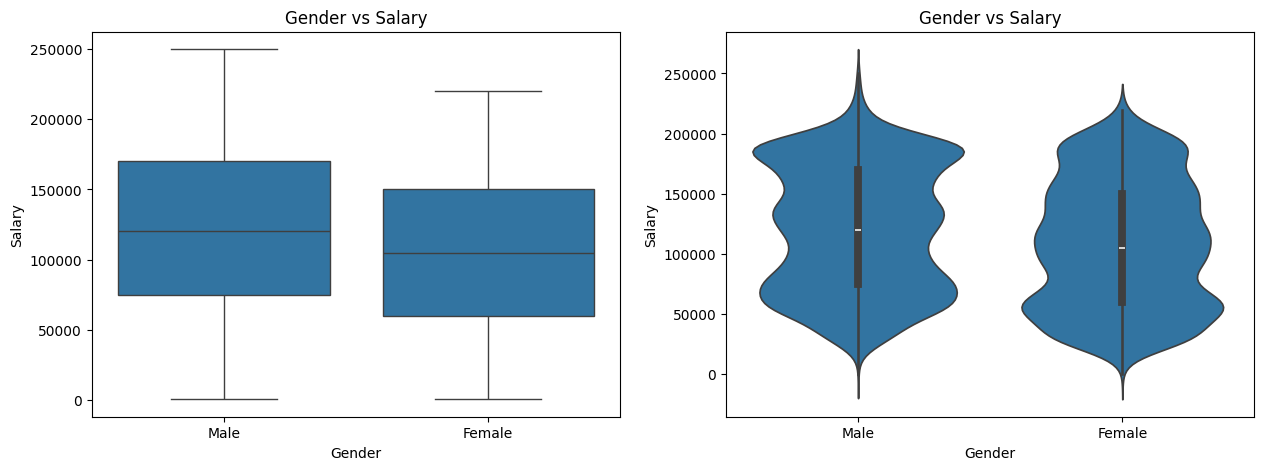

In [32]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.boxplot(x = 'Gender', y='Salary', data = df, ax =ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = df, ax =ax[1]).set_title('Gender vs Salary')

The boxplot and violin plot describe the salary distribution among the Male and Female employees. In the boxplot, Males have a median salary of approximately 107,500, while Females have a slightly lower median salary around 100,000. The salary distribution for Males is more concentrated, with most salaries ranging between 50,000 and 100,000, though there are some higher salary values approaching 200,000. In the violin plot, the salary distribution for Females is more spread out compared to Males, with most Female salaries concentrated around 50,000 but with a wider range, indicating more variability in salary. This suggests that while Males tend to have a more concentrated salary range, Females experience a broader distribution with more diversity in their pay levels.

### Education Level and Salary

Text(0.5, 1.0, 'Education Level vs Salary')

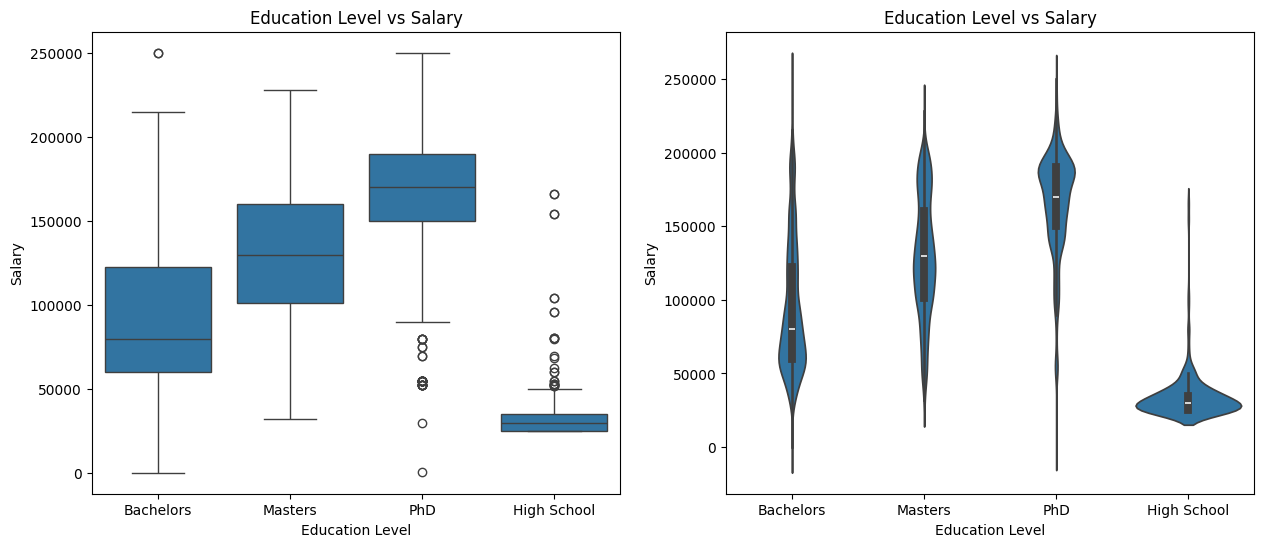

In [33]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[1]).set_title('Education Level vs Salary')

The boxplot and violinplot shows the distribution of salary based on the employees education level. The median salary for the Phd holders is highest followed by Masters and bachelors degreee holders, with employees with no degree having the lowest median salary. In the violinplot the phd scholars have distribution near 200000, whereas Masters degree holders have a very sleak distribution where the salary distribution is spread from 100k to 150k, The Bachelors degree holders have a salary distribution near 50000 whereas the employees with no degree have a salary distribution near 40k-45k.

From these graph, I assume that the employees with higher education level have higher salary than the employees with lower education level.

### Job title and Salary

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14448\2973789059.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Job Title',y='Salary',data=df, palette = 'Set2')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

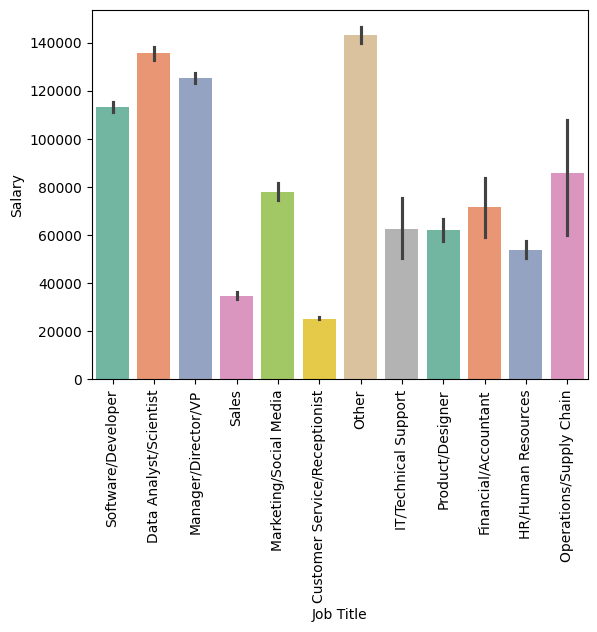

In [34]:
sns.barplot(x='Job Title',y='Salary',data=df, palette = 'Set2')
plt.xticks(rotation=90)

This graph falsifies my previous hypothesis regarding the demand and paywith respect to job titles. In this graph, 'Other' category job titles have higher salary than those titles which assumed to be in high demand and pay. In contrast to previous Job title graph, this graph shows that there is no relation between the job title distribution and salary. The job titles which gave high salary are found to be less in number.

However the hypothesis is true about the Job titles such as Software Developer, Data analyst/scuentust and Manager/Director/VP. These job titles are found to be in high demand and pay. But in contrast to that the job titles such as Operation/Supply chain, HR, Financial/Accountant and Marketing/Social Media are found have much more salary as assumed.

### Experience and Salary

Text(0.5, 1.0, 'Years of Experience vs Salary')

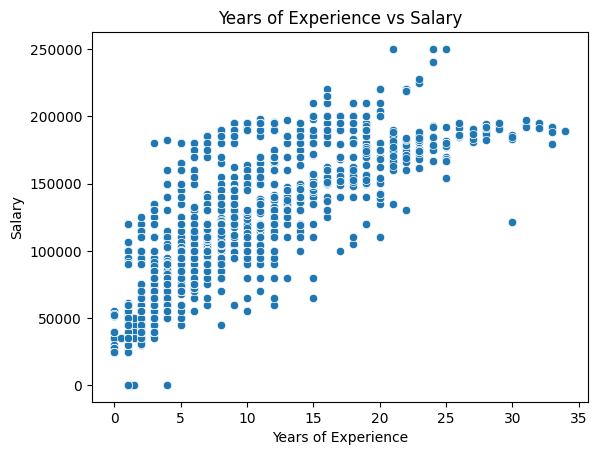

In [35]:
sns.scatterplot(x= 'Years of Experience', y= 'Salary', data = df).set_title('Years of Experience vs Salary')

From this scaaterplot, it is clear that on the whole, the salary of the employees is increasing with the years of experience. However, on closer look we can see that similar experience have different salaries. This is because the salary is also dependent on other factors like job title, age, gender education level as discussed earlier.

### Country and Salary

<Axes: xlabel='Country', ylabel='Salary'>

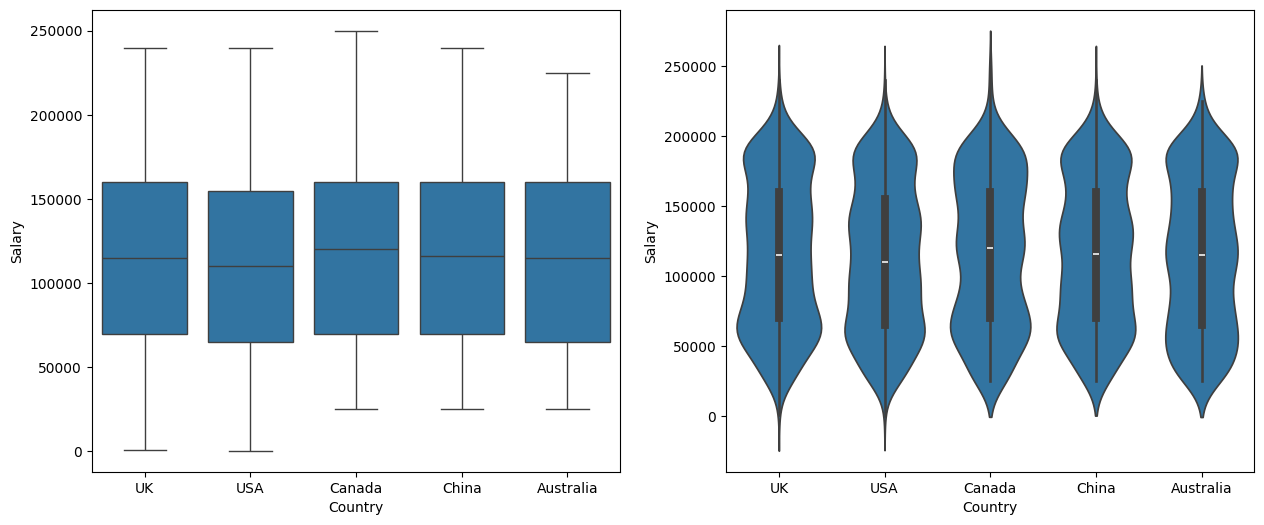

In [36]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Country', y = 'Salary', data = df, ax=ax[0])
sns.violinplot(x = 'Country', y = 'Salary', data = df, ax=ax[1])

Both the boxplot and violinplot shows very similar insight about the salary across all the countiries even in the violinplot distribution. However, there is very small variation in median salary in USA, which is slighlty less as compared to other countries.


Since, the we cannot get much information about the salary with respect to the countries. So, I will plot the job title vs salary graph for each country, so that we can get a overview of job title vs salary for each country.

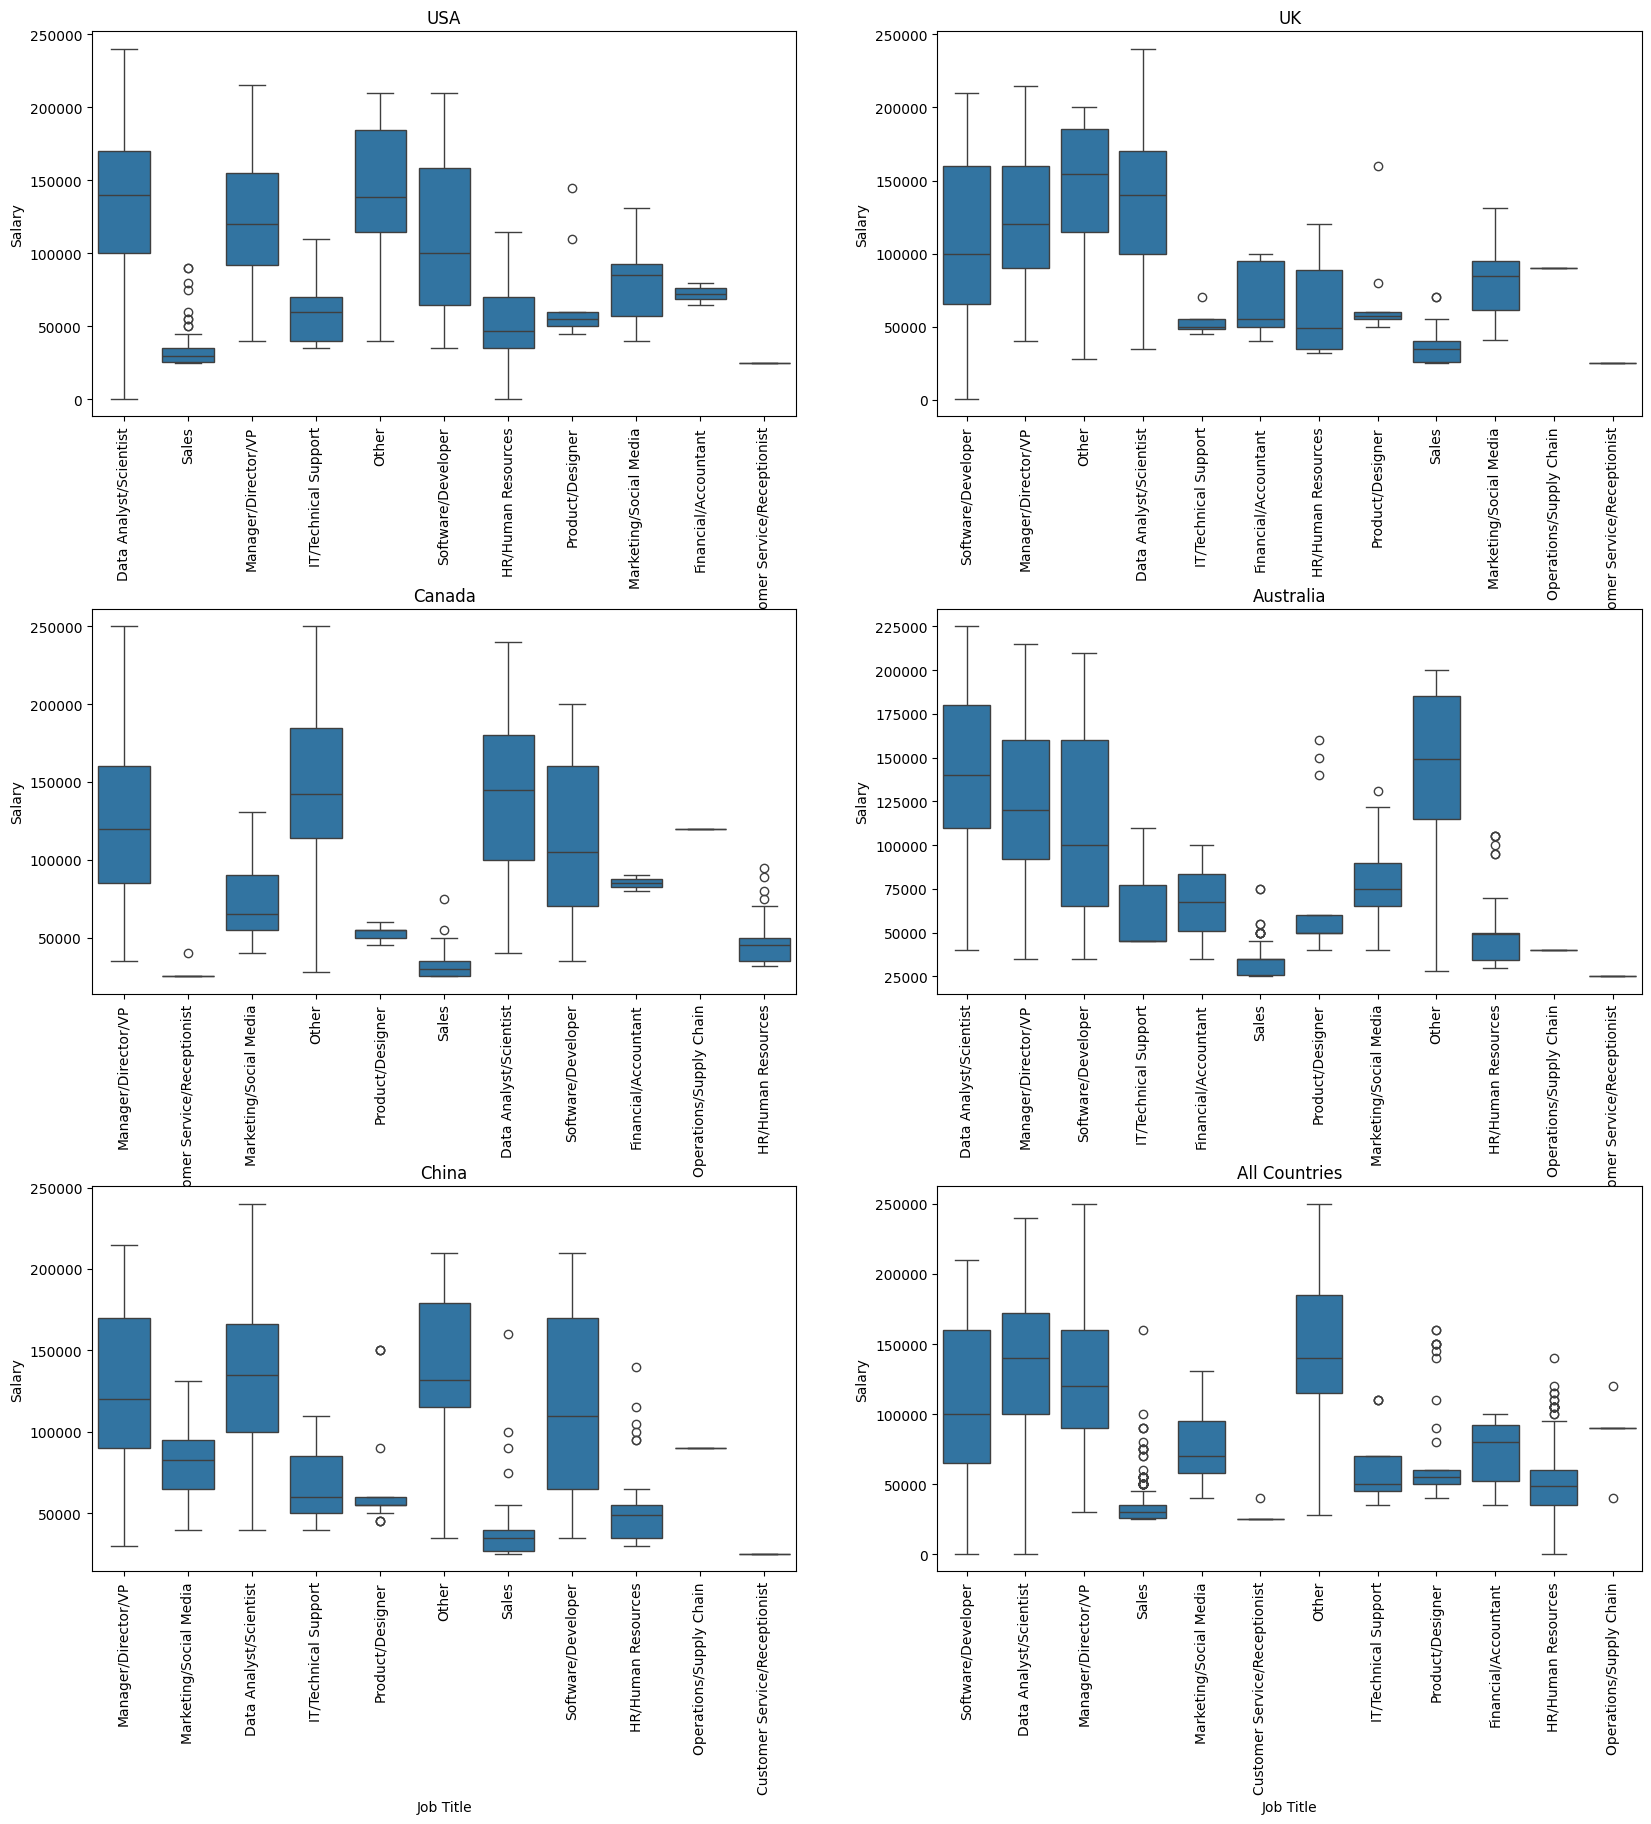

In [37]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'USA'], ax = ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)

After observing all these plots, I conclude that the Job Titles such as Softwarre Developer, Manager/Director/VP and Data Analyst/Scientist hare in high demand as well as receive much higer salary than other job titles, excluding the Job Titles that come under 'Other' category. The job titles such as Operation/Supply Chain, Customer Service/Receptionist, Product Designer and sales are in low demand and have low salary.

### Race and Salary

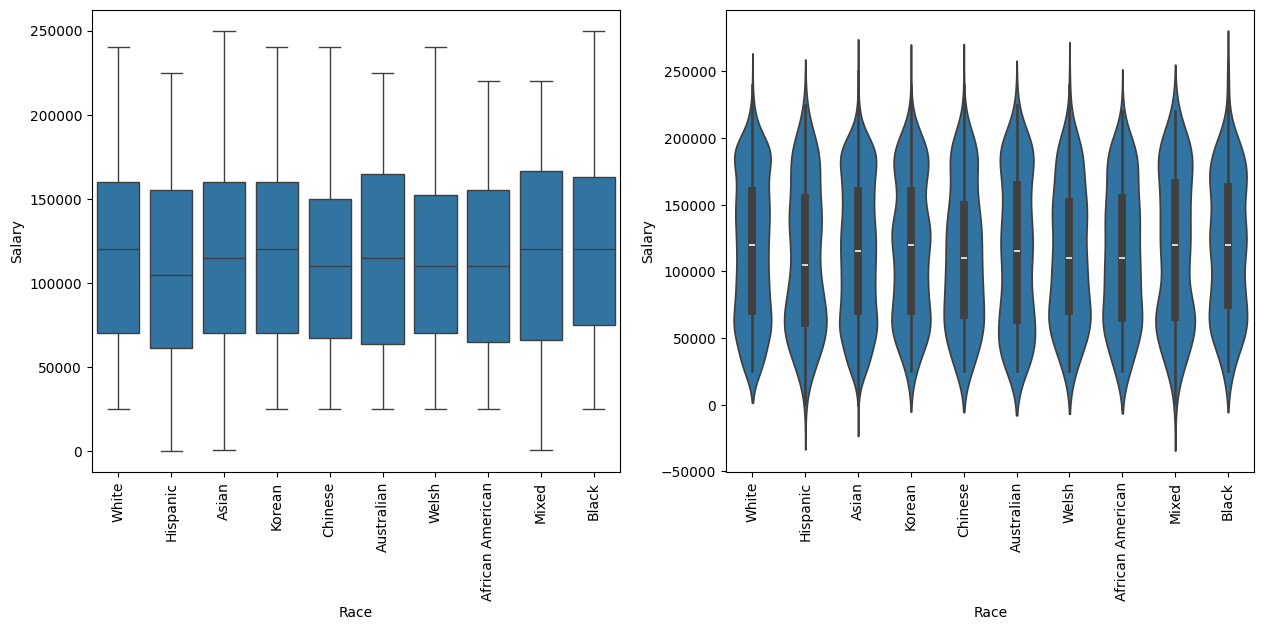

In [38]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Race', y = 'Salary', data = df, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.violinplot(x = 'Race', y ='Salary', data = df, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)


The employees from the races - Australian, Mixed, Blacks and White have the highest median salary, followed by Asian, Korean and Chinese with lowest median salary in employees from hispanic race. Looking at the violinplot the salary distribution is more concentrated after 150k in white, australian, black and mixed race. Whereas the hispanic has more concentration near 75k

# Data preprocessing 2

In [39]:
from sklearn.preprocessing import LabelEncoder
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    print(col, df[col].unique())

Gender [1 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Country [3 4 1 2 0]
Race [9 5 1 6 4 2 8 0 7 3]


### Normalization

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [41]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.212044,1,0,11,-0.510499,-0.479277,3,9
1,-0.738676,0,2,1,-0.842237,-0.952736,4,5
2,1.499513,1,3,5,1.148191,0.657025,1,9
3,0.314589,0,0,10,-0.178761,-1.047428,4,5
4,2.421120,1,2,5,1.977536,1.603944,4,1


## Coorelation Matrix Heatmap

<Axes: >

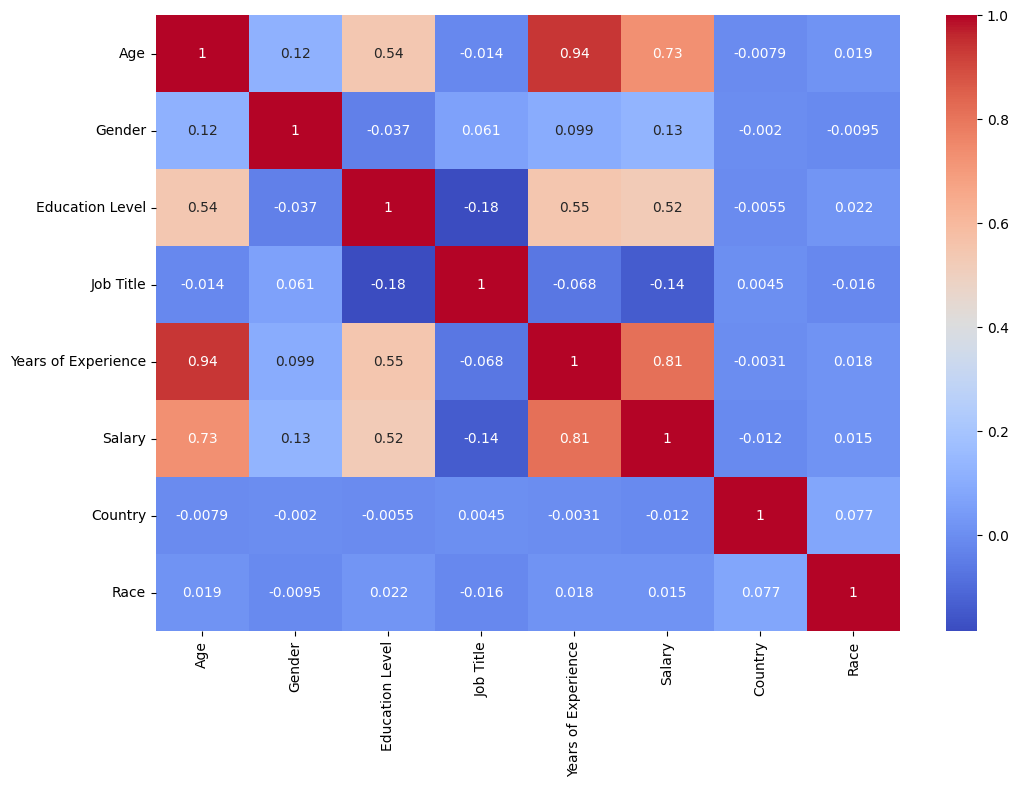

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In this coorelation matrix, there are three major coorealtions.
- Salary and Age
- Salary and Years of Experience
- Years of Experience and Age

The coorelation salary with age and years of experience is already explored in the above plots. The coorelation between the years of experience and age is obvious as the person ages the experience will be more.

### Train and Test Split

In [43]:
X=df.drop(columns='Salary',axis=1)
Y=df['Salary']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:
x_train.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
2924,0.314589,0,2,11,0.816453,0,9
5040,-1.265309,0,1,10,-1.173975,1,3
3288,-1.133651,0,2,11,-1.008106,3,9
2342,-1.133651,0,2,11,-1.008106,3,1
801,-0.607018,0,2,1,-0.344630,0,2


In [45]:
x_test.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
3106,-1.001993,1,2,8,-0.842237,4,1
5844,0.051273,1,3,5,0.484715,1,1
1454,-0.870335,1,0,11,-0.842237,1,9
5946,-0.212044,1,0,5,-0.178761,1,9
6090,0.841222,0,0,5,1.314060,2,4


## Salary Prediction

I will be using the following models:
- Decision Tree Regressor
- Random Forest Regressor

### Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

In [64]:
from sklearn.model_selection import GridSearchCV

#defining the parameters for the grid search
parameters = {'max_depth' :[2,4,6,8,10],
              'min_samples_split' :[2,4,6,8],
              'min_samples_leaf' :[2,4,6,8],
              'max_features' :[None,'sqrt','log2'],
              'random_state' :[0,42]}
#creating the grid search object
grid_search = GridSearchCV(dtree,parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

#fit the grid search object to the training data
grid_search.fit(x_train,y_train)

#print the best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


In [65]:
dtree = DecisionTreeRegressor(max_depth = 10, max_features = None, min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
dtree

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,8
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [66]:
dtree.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,8
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [67]:
dtree.score(x_train,y_train)

0.9647151184800242

In [69]:
#predicting the salary of an employee 
d_pred = dtree.predict(x_test)

## Evaluating the Decision Tree Regressor Model

In [70]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,-0.504313,-0.629172
1,0.846409,0.900519
2,-0.668660,-0.740949
3,0.088874,0.201603
4,1.888019,1.888019
5,-1.104243,-1.095450
6,0.088874,0.050137
7,-1.142119,-1.145761
8,0.110085,0.123538
9,0.213735,0.075210


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14448\1762915883.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14448\1762915883.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com

<Axes: xlabel='Predicted', ylabel='Density'>

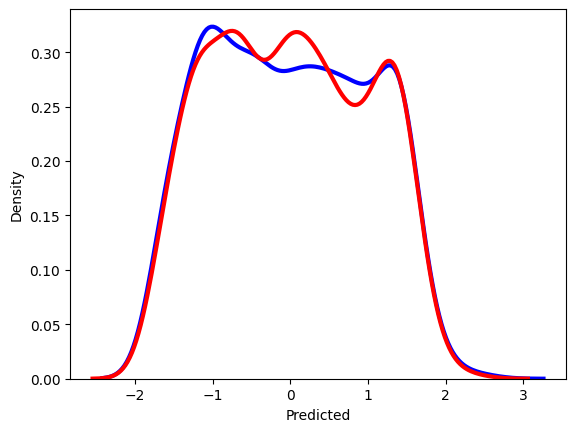

In [71]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

In [73]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.924814638523527
Mean Squared Error:  0.07493644604216826
Mean Absolute Error:  0.14079293433241855
RMSE: 0.27374522103987176


### Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [75]:
param_grid = {
    'n_estimators': [100, 200, 300],          # number of trees
    'max_depth': [None, 5, 10, 20],           # depth of each tree
    'min_samples_split': [2, 5, 10],          # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],            # minimum samples at a leaf
    'max_features': ['sqrt', 'log2', None],   # number of features to consider
    'bootstrap': [True, False]                # whether bootstrap samples are used
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=rfg,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    n_jobs=-1,                 # use all available cores
    verbose=2,                 # show progress
    scoring='r2'               # use R² as the evaluation metric
)

# Fit the model
grid_search.fit(x_train, y_train)

# Display best parameters and best score
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [76]:
rfg = RandomForestRegressor(bootstrap= True, max_depth= 20, max_features= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

In [77]:
rfg.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [78]:
rfg.score(x_train,y_train)

0.9820662635766622

In [80]:
r_pred = rfg.predict(x_test)

## Evaluating Random Forest Regressor Model

In [81]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,-0.504313,-0.786047
1,0.846409,0.887318
2,-0.668660,-0.682006
3,0.088874,0.338128
4,1.888019,1.868134
5,-1.104243,-1.152090
6,0.088874,0.088874
7,-1.142119,-1.128697
8,0.110085,0.096201
9,0.213735,0.251688


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14448\1762915883.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14448\1762915883.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com

<Axes: xlabel='Predicted', ylabel='Density'>

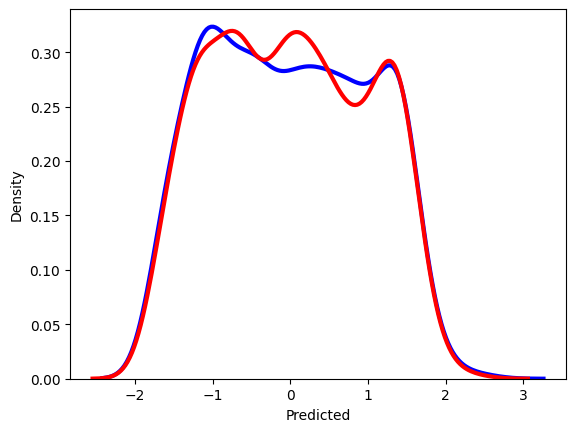

In [82]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

In [83]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9468173010707043
Mean Squared Error:  0.053006627492761776
Mean Absolute Error:  0.1174783666614962
RMSE: 0.23023168220894746


## Conclusion

From the exploratory data analysis, I have concluded that the salary of the employees is dependent upon the following factors:
1. **Years of Experience**
2. **Job Title**
3. **Education Level**

Employees with greater years of experience, having job title such as Data analyst/scientist, Software Developer or Director/Manager/VP and having a Master's or Doctoral degree are more likely to have a higher salary.

Coming to the machine learning models, I have used regressor models - Decision Tree Regressor and Random Forest Regressor for predicting the salary. The Random Forest Regressor has performed well with the accuracy of 94.6%